**MNIST Handwritten Digit Classification using DL (NN)**

WOrk Flow

Dataset --> Image Processing --> Train_test_split --> Neural Network

New image --> Trained Neural Network --> Hand written digit prediction

Evaluate the test data with neural network

importing the dependencies

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2     # for image recognisation
from google.colab.patches import cv2_imshow
# cv2_imshow --> to show an image / display an image -- present in cv2
# 'google.colab.patches' doesn't allow to use 'cv2_imshow' which is available in cv2
# so alternately give in 'google.colab.patches'
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
# set any value for seed
# when feed data to NN, NN start to learn data, there are several parameters randomly generated
# some parameters are given to NN, each time we train NN, we get different reseach
# accuracy value slightly changes
# when seed(3) - there won't will be random number
from tensorflow import keras
# keras - wrapper of DL libraries
# previously it is difficult to build NN using tensorflow, keras library easily create NN
from keras.datasets import mnist
# mnist - dataset and mnist available in Keras library
from tensorflow.math import confusion_matrix

Loading MNIST data (image data) from keras.datasets

load_data :
    we get 4 arrays(tuple of numpy arrays): x_train, y_train, x_test, y_test

In [82]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [83]:
type(x_train)

numpy.ndarray

In [84]:
print('x_train:',x_train.shape, '  y_train:',y_train.shape)
print('x_test :',x_test.shape,'   y_test:',y_test.shape)

x_train: (60000, 28, 28)   y_train: (60000,)
x_test : (10000, 28, 28)    y_test: (10000,)


x_train = (60000, 28, 28)

60000 : no. of images (training data - x_train (gray_scale))

28, 28 : size of each image

labels : stored in y_train

y - represents the labels corresponding to x

x_test - all tests data images :10000

y_test - represents corresponding labels for all x_test images


x_train:  NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train:  NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test:  NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test:  NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.


y = numbers which are handwritten to test the data

Training data = 60,000 img

Test data = 10,000 img

img dimension --> 28*28
gray_scale --> 1 channel

In [85]:
# printing the 10th imag from x_train
print(x_train[10])
# as ndarray - range:0-255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [86]:
x_train[10].shape

(28, 28)

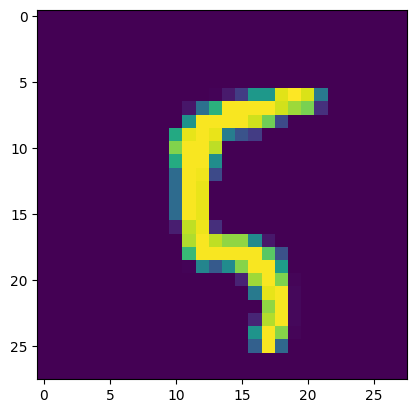

In [87]:
# displaying img
plt.imshow(x_train[100])
plt.show()
# this is gray_scale img that get in matplotlib

In [88]:
# print the corresponding label
print(y_train[100])

5


Image Labels

In [89]:
 # usnique value in y_train
 # training with one digit
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this label as such or we can apply ONe Hot Encoding

1(number of values) - 1s

9 - 0s

All the img have same dimensions in this dataset. if not, we have to resize all the img to common dimension

In [90]:
# scaling the values
#  0-255 --> 0-1 by /255
x_train = x_train/255
x_test = x_test/255

In [91]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [92]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

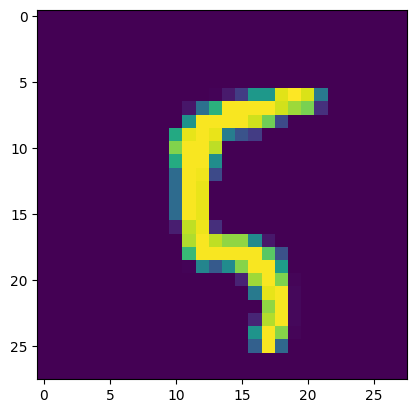

In [93]:
plt.imshow(x_train[100])

Building NN - RNN (REcurrent Neural Network)

RNN - text and audio data recognisation

CNN - Image recognization

In [94]:
from keras.engine.sequential import layer_module
# setting some layers for the NN
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28,1)), keras.layers.Dense(50,activation='relu'), keras.layers.Dense(50,activation='relu'), keras.layers.Dense(10,activation='sigmoid')])
# Faltten - instead of having somany rows, by Faltten - change to one row(1D array)
# Dense - all layers in particular NN are connected to neurons in previous and next layer_module
# Dense(50, activation='relu) - 50 neurons in layer, 'relu' - rectified linear unit
# few neurons - activated (value =1)
# other few neurons - (value=0)
# 2 activations - 'relu', 'sigmoid' : neurons files are different
# we can exchange 'sigmoid' and 'relu' and change the dense values.
# Dense(10, activation='sigmoid') - 10:no. of classes in labels(0-9)

In [95]:
# compiling the NN
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# optimizer, loss, accuracy(in form of matrix)
# optimize - to determine the model parameter. if we take one parameter, then we get accurate prediction, accuracy value is more
# 'adam' - one kind of optimzer
# loss fn - 'sparse_categorical_crossentropy'
# 'accuracy' - no.of correct pred / total no.of data

In [96]:
# training the NN
model.fit(x_train, y_train, epochs=10)
# fit - to train the model(x_train,y_train)
# epochs - no.of NN should go through the data

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3048 - accuracy: 0.9116
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1450 - accuracy: 0.9570
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1093 - accuracy: 0.9673
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0896 - accuracy: 0.9723
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0735 - accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0639 - accuracy: 0.9800
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0550 - accuracy: 0.9823
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.9837
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0437 - accuracy: 0.9861
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.036

loss value high, accuracy value is low -
loss value is loww, accuracy value is high

loss fn is constantly reduced

accuracy(acc on training data) = 0.914  --> we take 100 images, it will correctly predict 91 images

overfit - high acc in training data and low acc in test data

Training data accuracy = 98.9% accuracy

**Accuracy on Test data**

In [97]:
loss, accuracy = model.evaluate(x_test, y_test)
# model will take x_test alone and give its prediction
# and those predictions will compared to y_test
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1032 - accuracy: 0.9738
0.973800003528595


loss rate:0.1%, accuracy rate:97%

Test data accuracy = 97.37%

In [98]:
print(x_test.shape)

(10000, 28, 28)


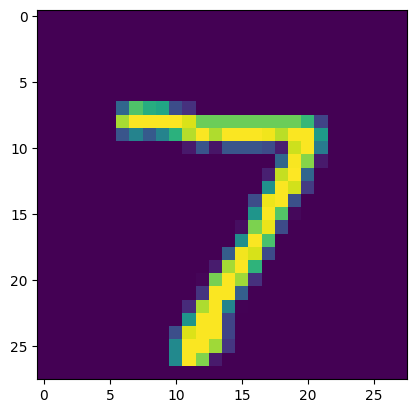

In [99]:
# 1st data point in x_test
plt.imshow(x_test[0])
plt.show()

In [100]:
print(y_test[0])

7


In [101]:
y_pred = model.predict(x_test)
# predict all 10000 imgs

313/313 [==============================] - 1s 2ms/step


In [102]:
y_pred.shape
# we have 10 values {to check: y_pred[0]}

(10000, 10)

for ML model, use predict - it return the label value is 0 - 9

When we use predict fn to NN it works differently

In [103]:
y_pred[0]

array([7.3540673e-06, 9.8824094e-04, 6.4004374e-01, 9.8951781e-01,
       3.8595093e-07, 3.8811553e-03, 1.5116346e-10, 9.9999905e-01,
       7.8935700e-04, 8.5426074e-01], dtype=float32)

model.predict() gives the prediction probability of each class for that data

In [104]:
# converting the prediction probability to class label

label_for_first_img = np.argmax(y_pred[0])
print(label_for_first_img)

7


In [105]:
# converting the prediction probability to class label for test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [106]:
print(y_pred)
# convert all probability to classes

[[7.3540673e-06 9.8824094e-04 6.4004374e-01 ... 9.9999905e-01
  7.8935700e-04 8.5426074e-01]
 [2.2516410e-06 8.2101953e-01 9.9999684e-01 ... 6.8760337e-06
  9.8085580e-03 1.3901029e-12]
 [2.1046010e-06 9.9997824e-01 5.0848518e-03 ... 6.1063910e-01
  3.4984615e-01 7.2626042e-04]
 ...
 [1.4017108e-06 3.1866975e-07 7.6996112e-06 ... 3.0025861e-01
  1.9456530e-02 9.7825837e-01]
 [5.7563378e-04 2.2300859e-05 1.9570329e-05 ... 1.7178353e-02
  6.2028233e-02 3.6647881e-12]
 [1.1600560e-05 6.5767770e-03 3.1370349e-04 ... 6.4400877e-13
  5.8952655e-06 7.2133857e-12]]


y_test --> True labels

y_pred_labels --> Predicted labels

confusion matrix

In [107]:
conf_matrx = confusion_matrix(y_test, y_pred_labels)

In [108]:
conf_matrx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    1,    0,    3,    1,    6,    1,    1,    2,    1],
       [   0, 1128,    2,    0,    0,    1,    1,    1,    2,    0],
       [   0,    6,  999,    4,    3,    2,    2,   10,    6,    0],
       [   0,    1,    4,  977,    0,   14,    0,    7,    4,    3],
       [   0,    2,    0,    1,  958,    2,    7,    3,    0,    9],
       [   1,    0,    0,   13,    1,  864,    1,    3,    6,    3],
       [   2,    3,    2,    0,    4,   13,  930,    0,    4,    0],
       [   0,    5,    7,    0,    1,    0,    0, 1012,    0,    3],
       [   2,    1,    3,    7,    4,    9,    1,    5,  940,    2],
       [   3,    3,    0,    6,    8,    4,    0,   15,    5,  965]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

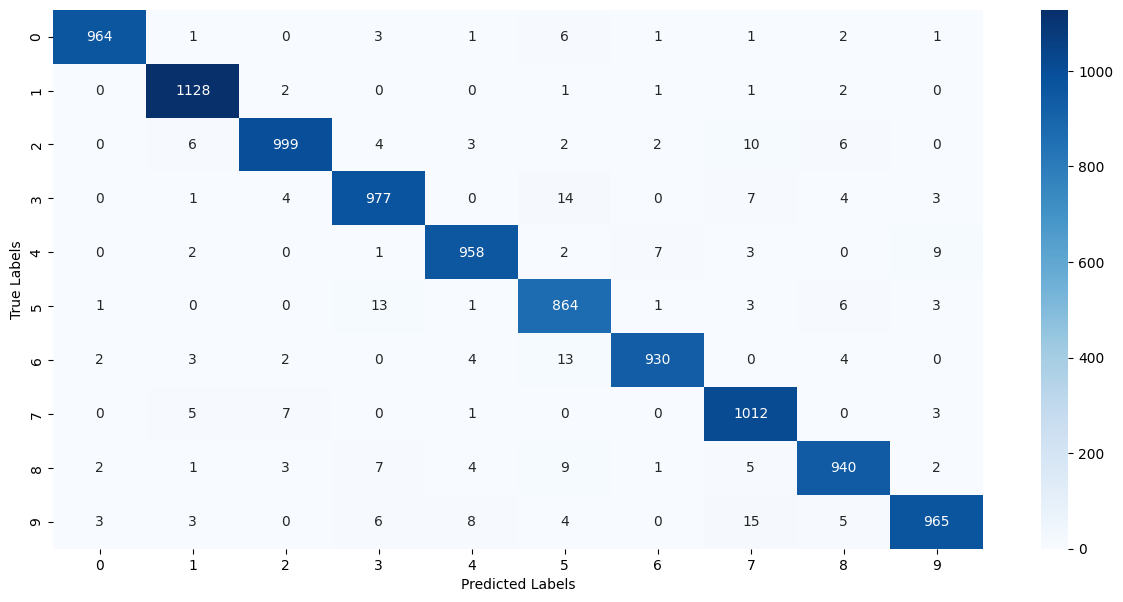

In [109]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrx, annot=True, fmt = 'd', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

967 - 967 img has correctly predicted to zero
967 images (represented as 0), but predicted as 0.

when true label=0, 0 predicted value is predicted as 1(in predicted labels)
ie, img is zero, but it predicted as 1

2 imgs (represented as zero), but predicted as 2

2122 img (represented as 1), but predicted as 1

10 img (represented as 9), but wrongly predicted as 5

1004 img (represented as 7), but predicted as 7

930 img (represented as 9), but predicted as 9

# Build a Predictive System

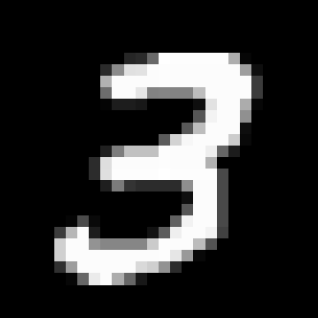

In [110]:
input_image = cv2.imread('/content/MNIST_digit.png')
cv2_imshow(input_image)

In [111]:
type(input_image)

numpy.ndarray

In [112]:
input_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [113]:
input_image.shape

(318, 318, 3)

When we take img '2'. the shape (28,28). so we need to convt input_image shape (318,318) to (28,28). Before that we need to convt channel 3 to channel 1

In [114]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

(318, 318)

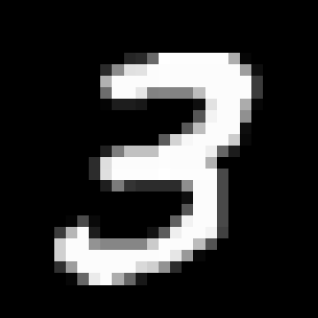

In [115]:
cv2_imshow(grayscale)

In [116]:
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize.shape

(28, 28)

In [117]:
cv2_imshow(input_image_resize)

Scaled

In [118]:
input_image_resize = input_image_resize/255
# all values btw 0 to 1

In [119]:
type(input_image_resize)
# it is nd array, not in the form of img
# cv2_imshow - ndarray to image

numpy.ndarray

In [120]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])
# 1 - take 1 img
# [1,28,28,3] --> 3:RGB

Saying to NN that we are not giving 10,000 img. we only give 1 img fro prediction

In [121]:
input_prediction = model.predict(image_reshaped)
input_prediction
# printed for 1 img

1/1 [==============================] - 0s 23ms/step


array([[4.7736777e-13, 3.8257271e-02, 1.3681204e-04, 1.0000000e+00,
        8.7503546e-11, 3.7542570e-01, 8.4401555e-20, 3.4785286e-02,
        3.7810706e-02, 9.9259442e-01]], dtype=float32)

In [122]:
# to find the label
input_pred_label = np.argmax(input_prediction)
# to find the highest value

In [123]:
input_pred_label

3

The model predicted correctly the input_image as 3.

# Predictive System



Path of image to be predicted /content/MNIST_digit.png


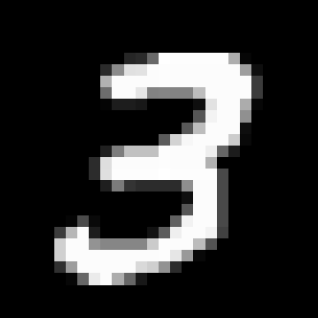

1/1 [==============================] - 0s 28ms/step
The Handwritten Digit is recognised as : 3


In [136]:
input_image_path = input('Path of image to be predicted ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as :', input_pred_label)

error: ignored

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def grayscale(image):
    return image.convert("L")

# ... (rest of the functions remain the same)

if __name__ == "__main__":
    # Load the image
    image = Image.open("/content/sim_image_random.jpg")

    # Define light direction (x, y, z) - you may change this based on your scene
    light_direction = [-1, 0, 1]

    # Define Phong material colors
    ambient_color = np.array([139, 0, 255])
    diffuse_color = np.array([139, 0, 100])  # Change this to a different color if desired
    specular_color = np.array([255, 255, 255])

    # Phong shininess coefficient
    shininess = 100

    # Apply Phong shading and save the result
    phong_image = phong_shading(image, light_direction, ambient_color, diffuse_color, specular_color, shininess)
    phong_image.save("phong_image.jpg")
    #phong_image.show()
    plt.imshow(phong_image)
    plt.axis('off')  # Turn off axis ticks and labels
    plt.show()
